In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns

In [2]:
Employee = pd.read_csv('Employee.csv')

In [3]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
(Employee.isnull()).sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
Employee['Education'].value_counts()

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64

In [6]:
Employee_histogram = Employee[['Education', 'PaymentTier']]
Employee_histogram.head()

,Education,PaymentTier
0,Bachelors,3
1,Bachelors,1
2,Bachelors,3
3,Masters,3
4,Masters,3


In [14]:
education_counts = Employee['Education'].value_counts()

fig = px.pie(values=education_counts.values, names=education_counts.index, 
             color=education_counts.index, title='Distribution of Educational Qualifications')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

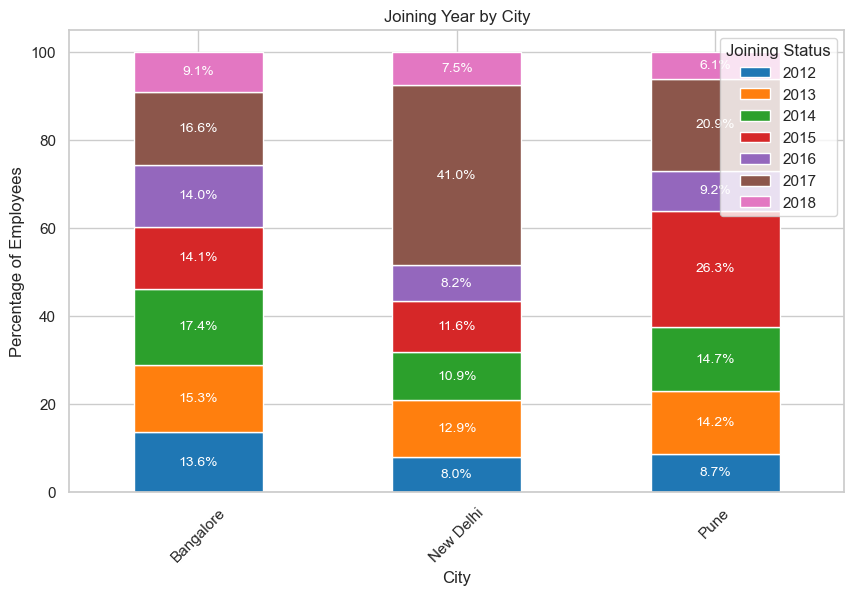

In [30]:
# Count the occurrences of 'Joining Year' in each city
JoiningYear_accros_cities = Employee.groupby(['City', 'JoiningYear']).size().unstack()

# Calculate the percentage of employees who have left or stayed in each city
JoiningYear_accros_cities_percentage = JoiningYear_accros_cities.div(JoiningYear_accros_cities.sum(axis=1), axis=0) * 100

# Plotting
sns.set(style="whitegrid")
ax = JoiningYear_accros_cities_percentage.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'], figsize=(10, 6))

# Add labels with the percentage of turnover on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10, color='white')

plt.title('Joining Year by City')
plt.xlabel('City')
plt.ylabel('Percentage of Employees')
plt.legend(title='Joining Status',loc='upper right')
plt.xticks(rotation=45)

plt.show()

According the pervious chart:
- Hiring/Joining vary from year to another and they vary from city to another around 5%
- Also most of the years hiring from Bangalore is the highest while New Delhi is lowest in the most of the years
- Tacking in consideration that there's two years broke the norm and they hired 41% from New Delhi in 2017 and 26% from Pune in 2015

In [32]:
Gender_counts = Employee['Gender'].value_counts()

fig = px.pie(values=Gender_counts.values, names=Gender_counts.index, 
             color=Gender_counts.index, title='Gender distribution within the workforce')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

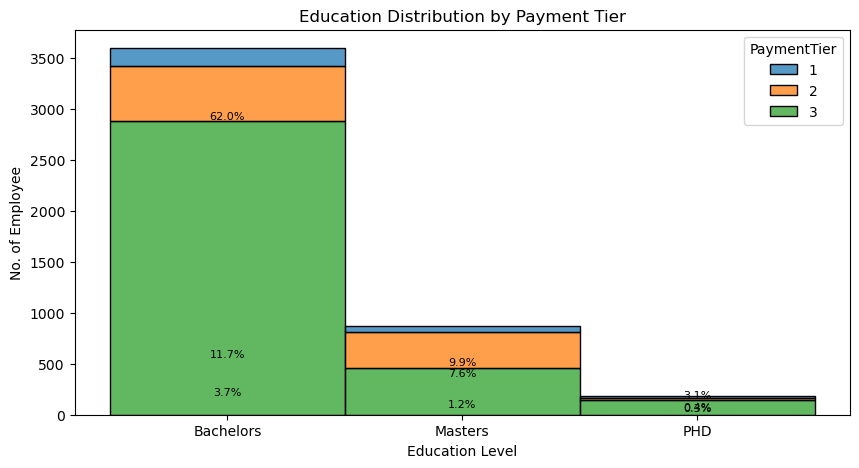

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create a stacked histogram for Education within each Payment Tier using Seaborn
sns.histplot(Employee, x="Education", hue="PaymentTier", bins=10, multiple="stack", palette="tab10", ax=ax)
ax.set_title('Education Distribution by Payment Tier')
ax.set_xlabel('Education Level')
ax.set_ylabel('No. of Employee')

total_count = len(Employee)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        if "Percentage" == "Percentage":  # To show percentages
            ax.annotate(f'{height / total_count:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)
        else:  # To show counts
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)
plt.show()

From the previous Education Distribution by Payment Tier graph, We could figure out:
- Most of the employee regardless of there education they are considered in the 3rd payment tier
- Most of the employee who are considered from payment tier 1 hold Bacelor degree

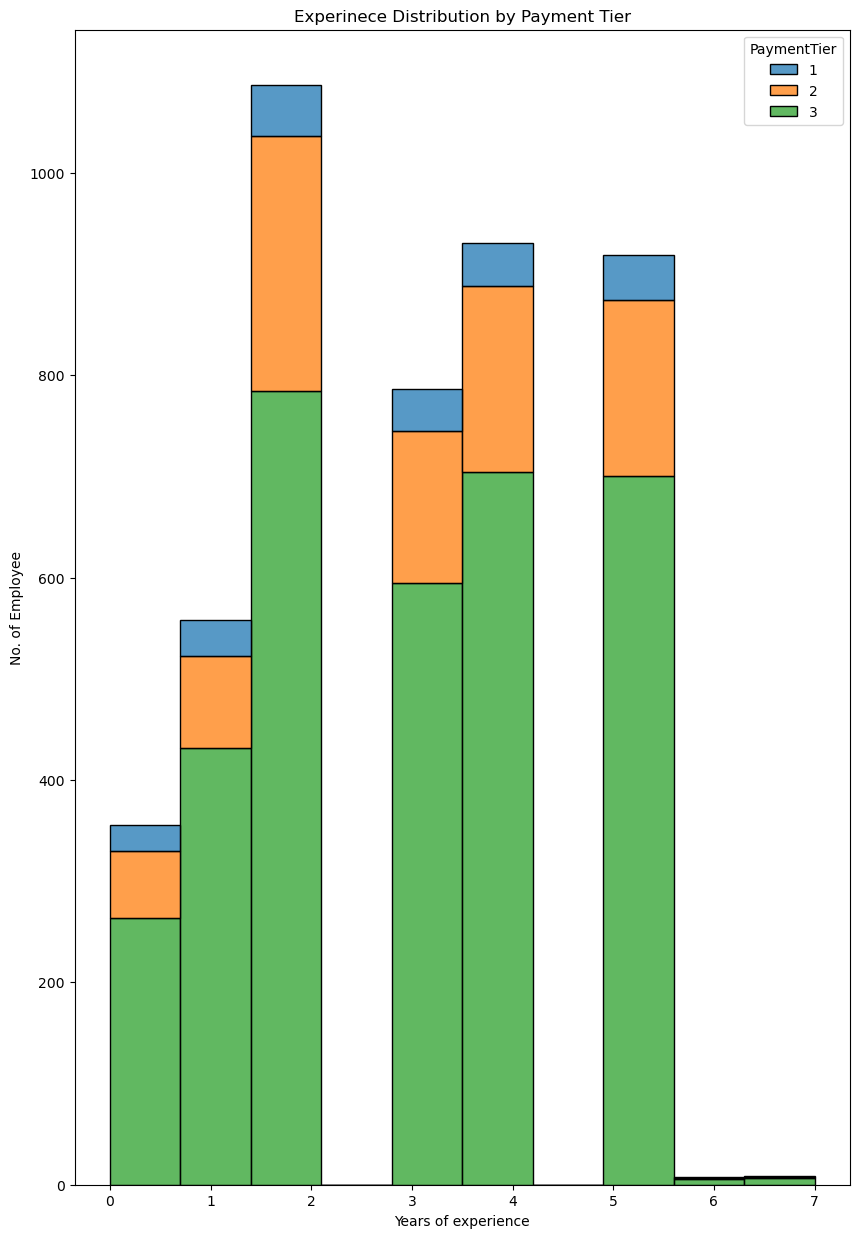

In [19]:
fig, ax = plt.subplots(figsize=(10, 15))

# Create a stacked histogram for Education within each Payment Tier using Seaborn
sns.histplot(Employee, x="ExperienceInCurrentDomain", hue="PaymentTier", bins=10, multiple="stack", palette="tab10", ax=ax)
ax.set_title('Experinece Distribution by Payment Tier')
ax.set_xlabel('Years of experience')
ax.set_ylabel('No. of Employee')

plt.show()

From the previous graph we could figure out that:
- Employee payment tier increase according to their years slightly.
- Most of the employee have more than 2 or more years of experince also most of them are in the lowest "3rd" payment tier.

# patterns in leave-taking behavior among employees

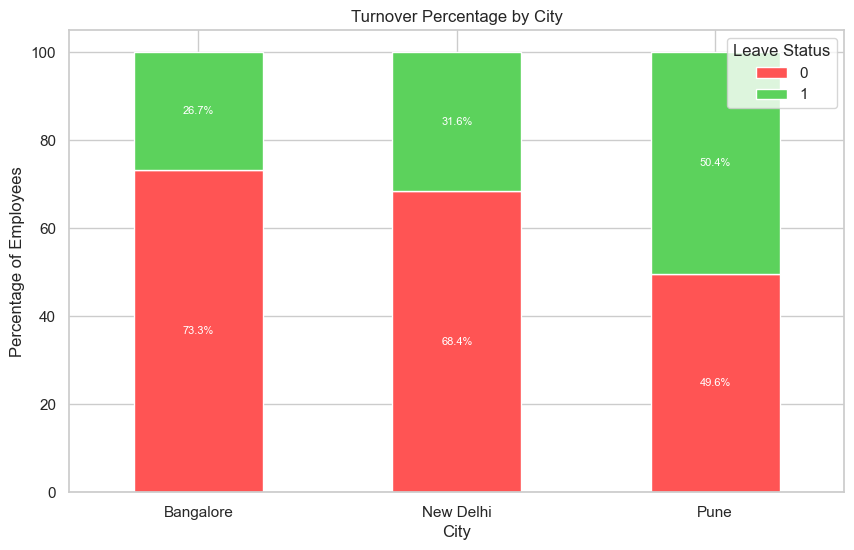

In [31]:
# Count the occurrences of 'Leave Or Not' in each city
city_leave_counts = Employee.groupby(['City', 'LeaveOrNot']).size().unstack()

# Calculate the percentage of employees who have left or stayed in each city
city_leave_percentage = city_leave_counts.div(city_leave_counts.sum(axis=1), axis=0) * 100

# Plotting
sns.set(style="whitegrid")
ax = city_leave_percentage.plot(kind='bar', stacked=True, color=['#FF5454', '#5CD25C'], figsize=(10, 6))

# Add labels with the percentage of turnover on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.title('Turnover Percentage by City')
plt.xlabel('City')
plt.ylabel('Percentage of Employees')
plt.legend(title='Leave Status')
plt.xticks(rotation=0)

plt.show()

'If we will predicat that 0 is yes that the employee left and 1 is No that the Employee didn't leave' The we can find out:
- Considering that living at Bangalore is a little bit higher than the other two cities would alert us of the reason of hugh turnover than the other two cities putting in mind that most of the employee considered in the lowest payment tier.
- Considering that Pune and New Delhi almost have the same cost of living it differe around 1% but we still have a huge gap between them in the turnover would alert us there's another reason would be like the distance between work and the city.
- Baring in mind the joining/hiring chart with Turnover chart this company should focus hiring from Pune city more if they want to decrease the turnover rate and have a better one.

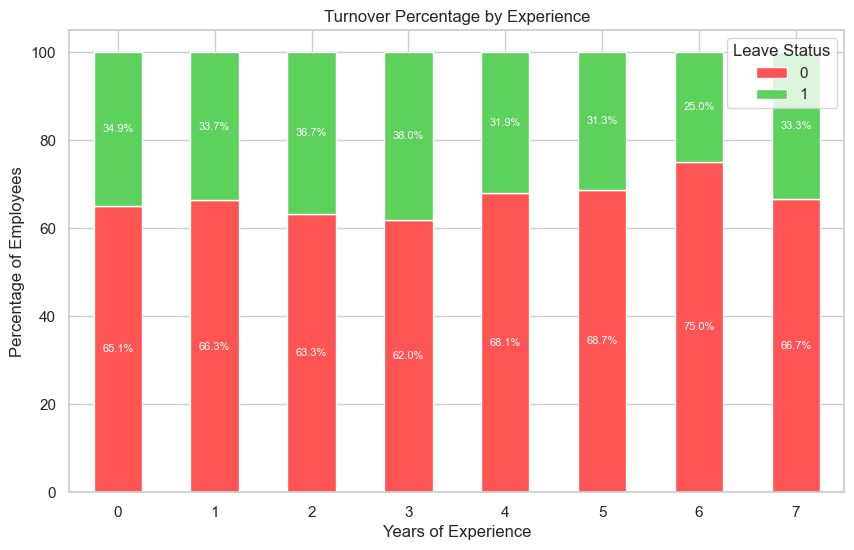

In [35]:
# Count the occurrences of 'Leave Or Not' according to the experience they have
Experience_leave_counts = Employee.groupby(['ExperienceInCurrentDomain', 'LeaveOrNot']).size().unstack()

# Calculate the percentage of employees who have left or stayed according to the experience they have
Experience_leave_percentage = Experience_leave_counts.div(Experience_leave_counts.sum(axis=1), axis=0) * 100

# Plotting
sns.set(style="whitegrid")
ax = Experience_leave_percentage.plot(kind='bar', stacked=True, color=['#FF5454', '#5CD25C'], figsize=(10, 6))

# Add labels with the percentage of turnover on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.title('Turnover Percentage by Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Percentage of Employees')
plt.legend(title='Leave Status')
plt.xticks(rotation=0)

plt.show()

- In prallel with the turnover behavior due to city location/cost of living. We can see that the turnover increase when the years of experience increase and that is logical if we considered the employee payment tier even though they have a wide experience

In [37]:
PaymentTier_counts = Employee['PaymentTier'].value_counts()

fig = px.pie(values=PaymentTier_counts.values, names=PaymentTier_counts.index, 
             color=PaymentTier_counts.index, title='Payment Tier distribution within the workforce')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

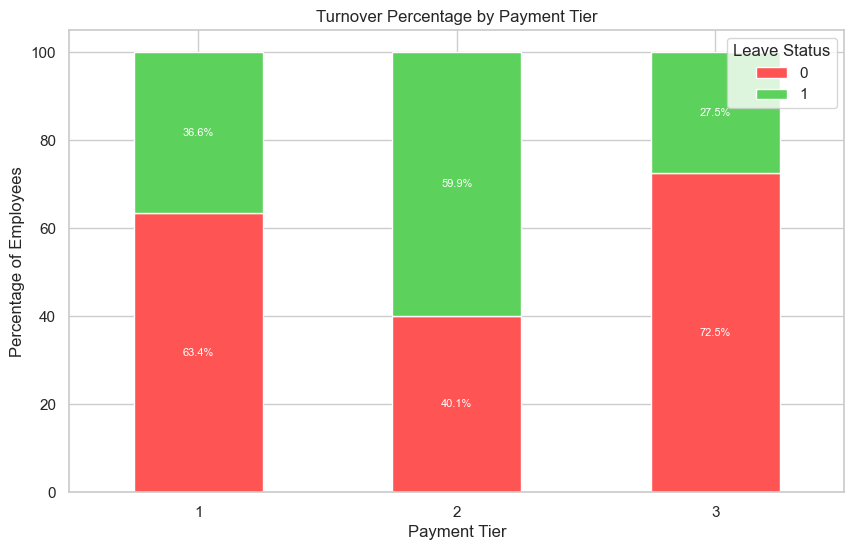

In [36]:
# Count the occurrences of 'Leave Or Not' according to the Payment Tier
PaymentTier_leave_counts = Employee.groupby(['PaymentTier', 'LeaveOrNot']).size().unstack()

# Calculate the percentage of employees who have left or stayed according to the experience they have
PaymentTier_leave_percentage = PaymentTier_leave_counts.div(PaymentTier_leave_counts.sum(axis=1), axis=0) * 100

# Plotting
sns.set(style="whitegrid")
ax = PaymentTier_leave_percentage.plot(kind='bar', stacked=True, color=['#FF5454', '#5CD25C'], figsize=(10, 6))

# Add labels with the percentage of turnover on each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=8, color='white')

plt.title('Turnover Percentage by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Percentage of Employees')
plt.legend(title='Leave Status')
plt.xticks(rotation=0)

plt.show()

Observation:
- When we observe the Payment Tier pie chart and Turnover bar chart we will know that 80% of the employee in payment tier 3 and 1. In addition that most of this two tiers leave.
- While around 20% of employee in payment tier two and most of them stay.
So we need to redifine market payment and ensure that not only payment tier two matching the market salaries.